<a href="https://colab.research.google.com/github/CodeCrafter-101/Exploratory_Data_Analysis-EDA-/blob/main/Bank_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
# Loading the Dataset

from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo


In [4]:
# Split
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Combine into a single DataFrame for EDA
df = pd.concat([X, y], axis=1)


In [5]:
print(df.shape)
print(df.dtypes)
print(df.head())
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum())           # missing values


(45211, 17)
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN

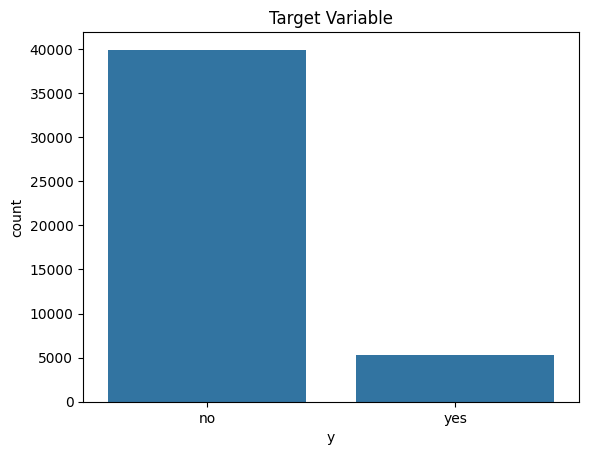

In [6]:
# target variable
sns.countplot(data=df, x='y')
plt.title('Target Variable')
plt.show()

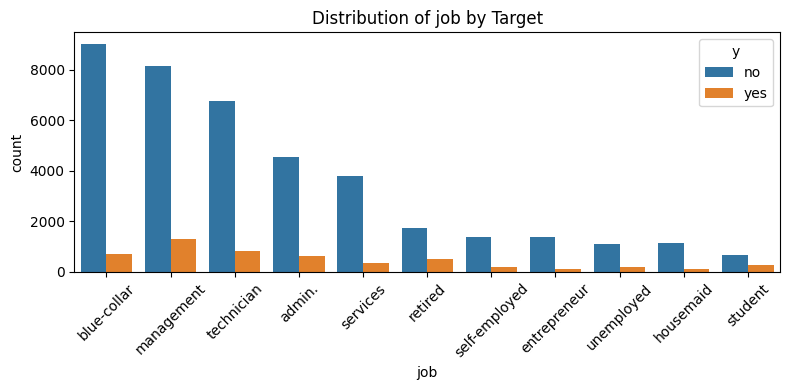

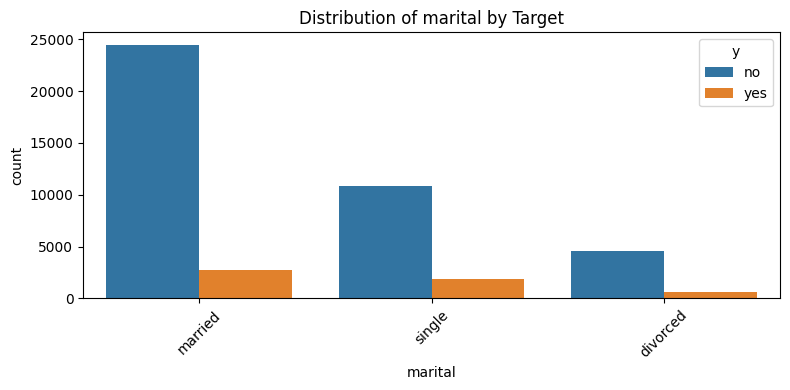

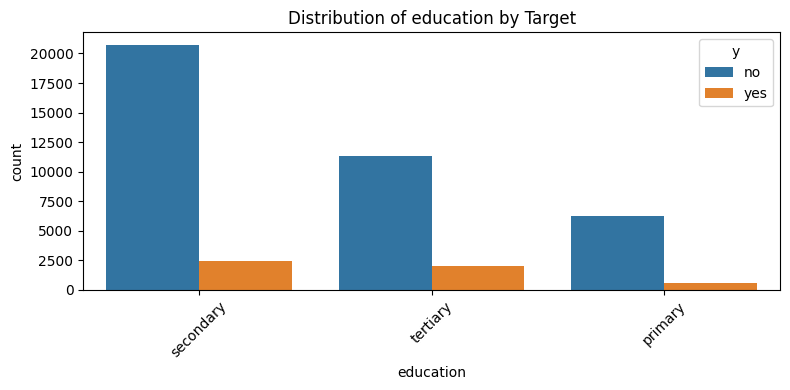

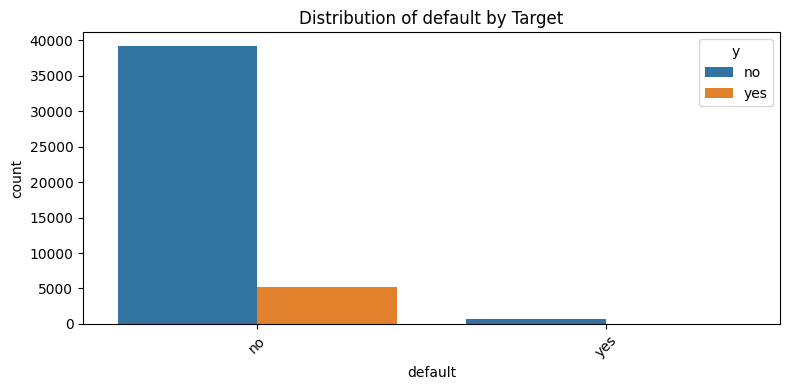

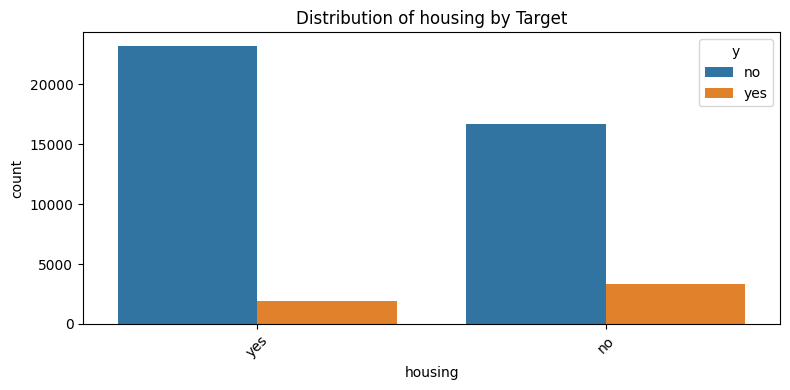

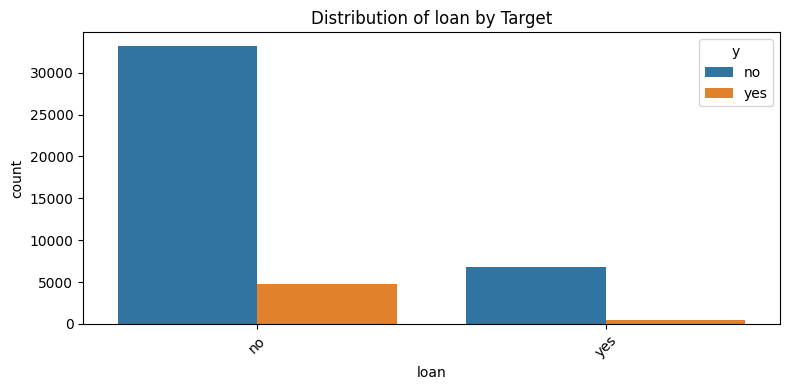

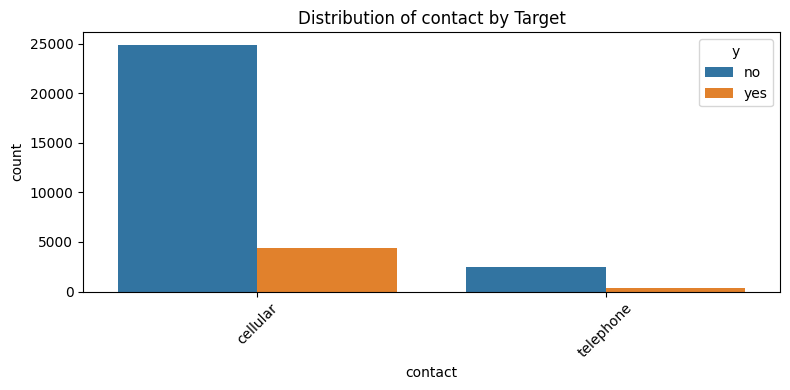

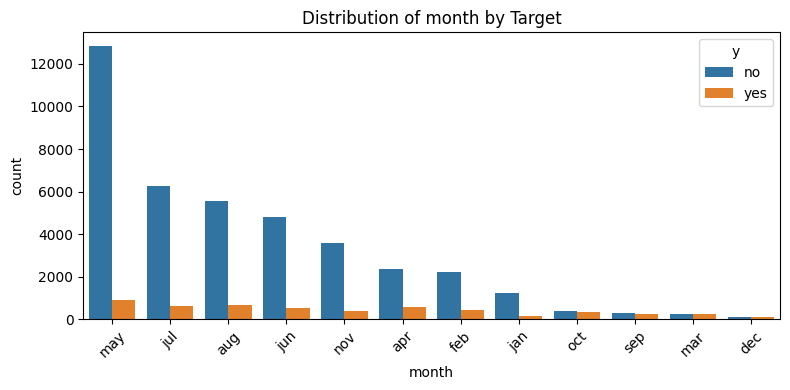

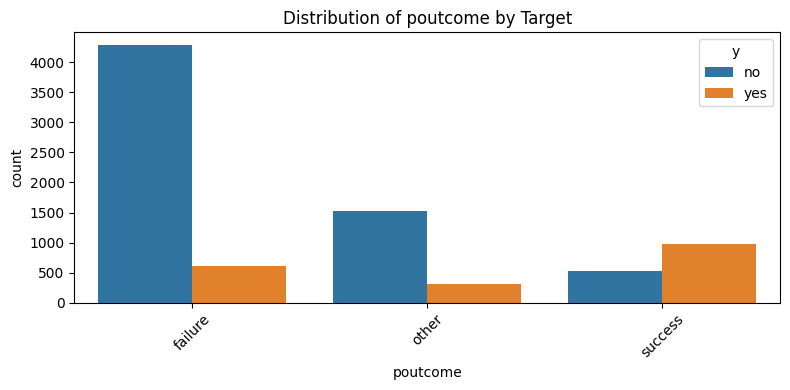

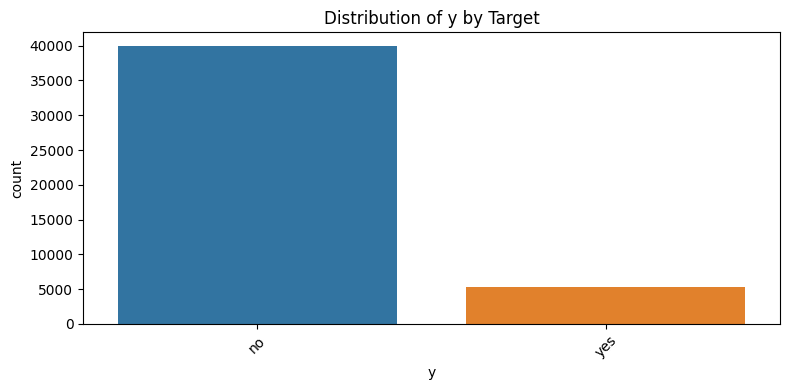

In [7]:
# Categorical Variable Exploration

categorical_cols = df.select_dtypes(include='object').columns

# Bar plots of categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='y', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col} by Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


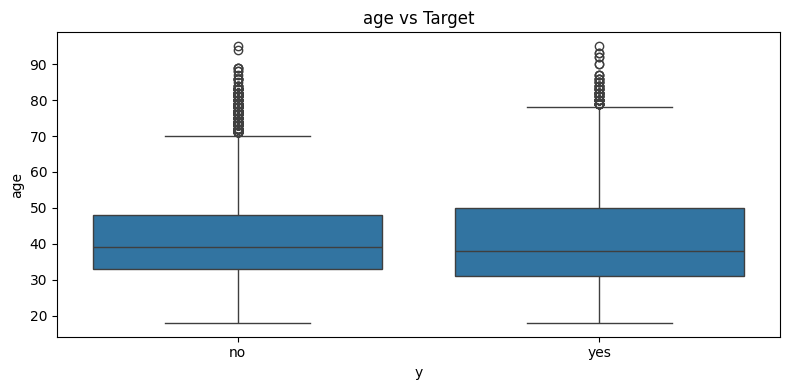

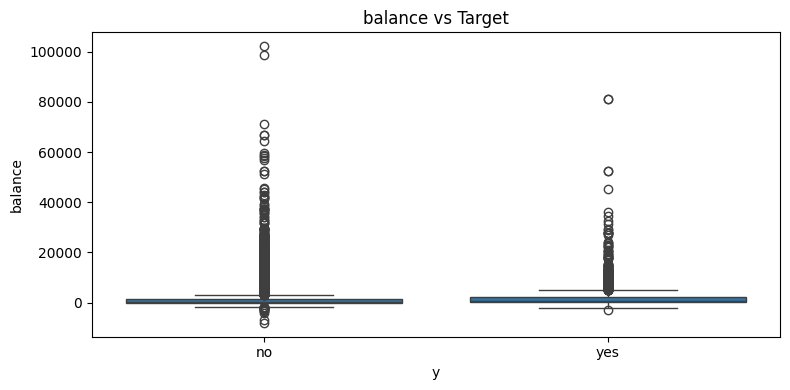

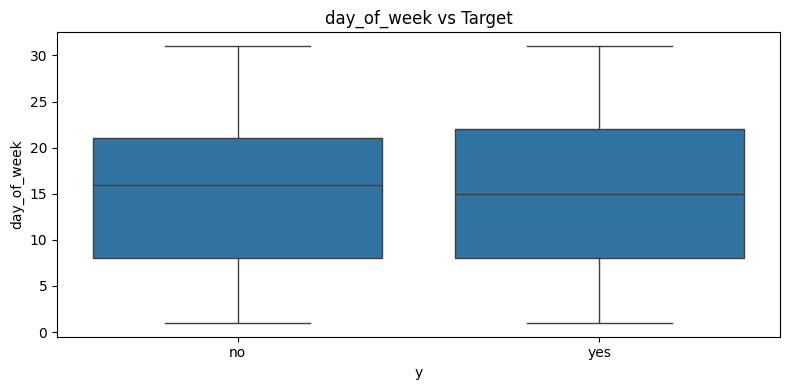

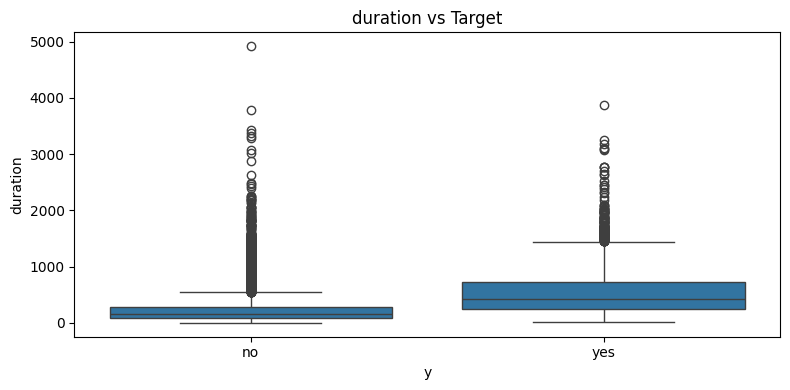

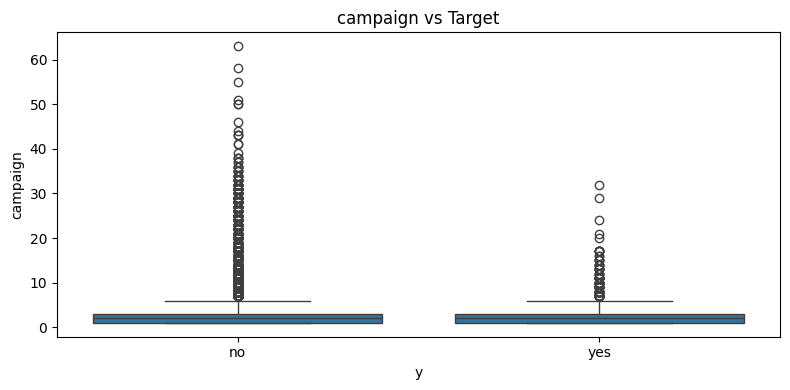

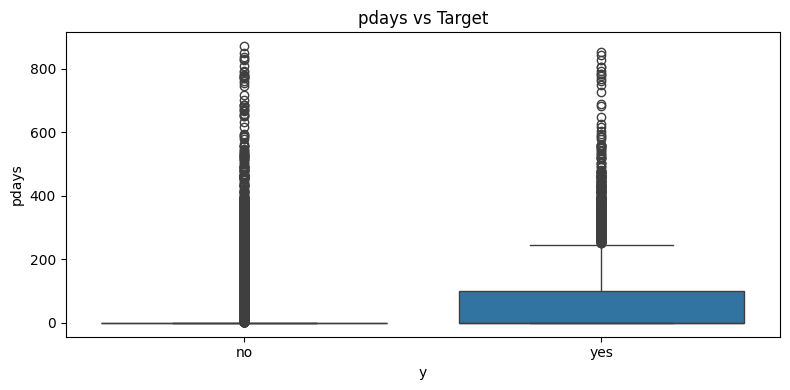

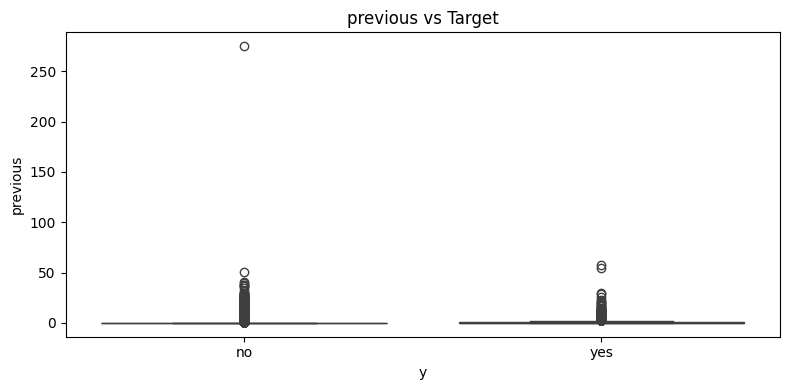

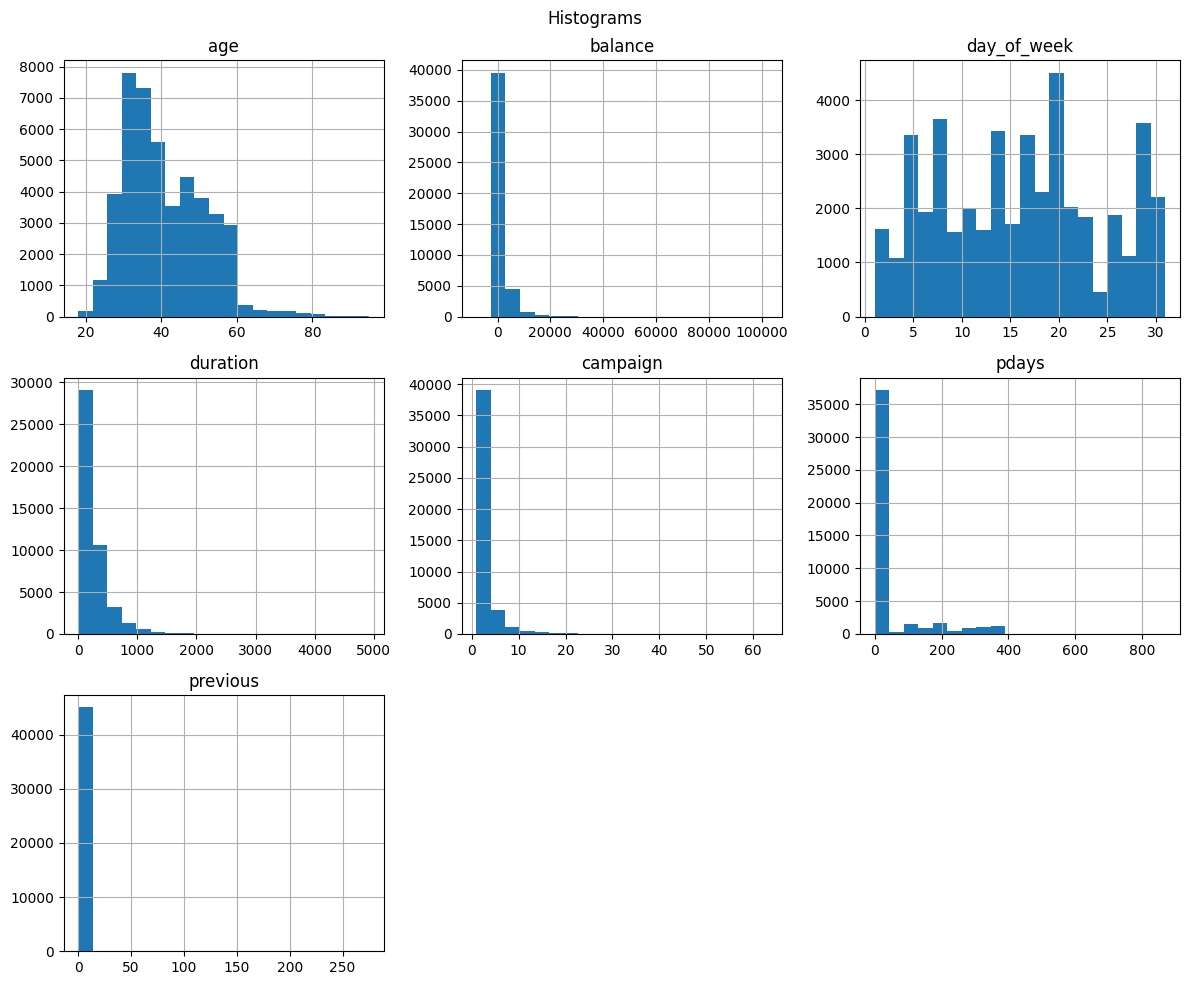

In [9]:
# Numerical value Exploration

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


# Boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='y', y=col)
    plt.title(f'{col} vs Target')
    plt.tight_layout()
    plt.show()


# Histograms
df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms')
plt.tight_layout()
plt.show()


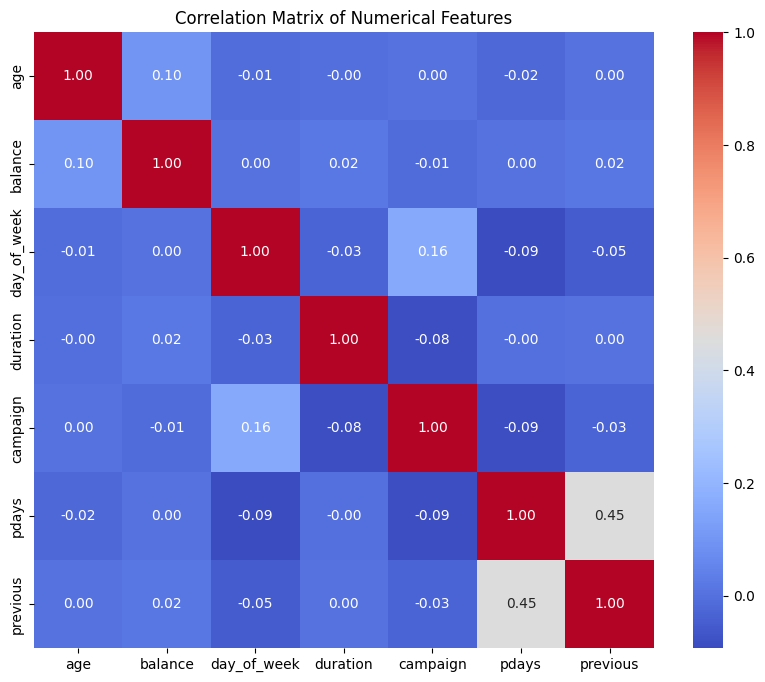

In [10]:
# correlation analysis

corr = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


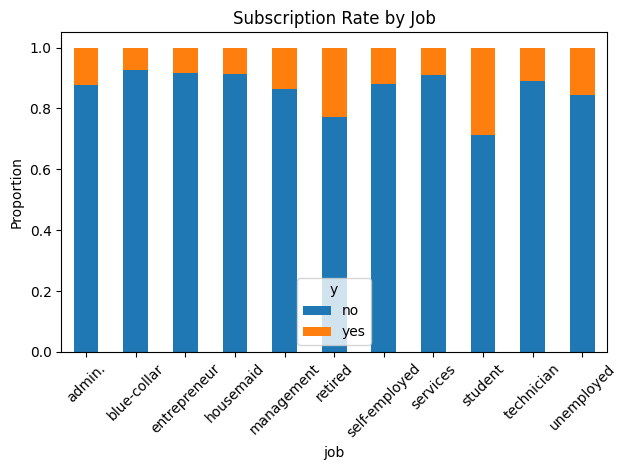

In [11]:
# Cross Tabulation and Grouping
# Example: Job vs subscription rate

pd.crosstab(df['job'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Subscription Rate by Job')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



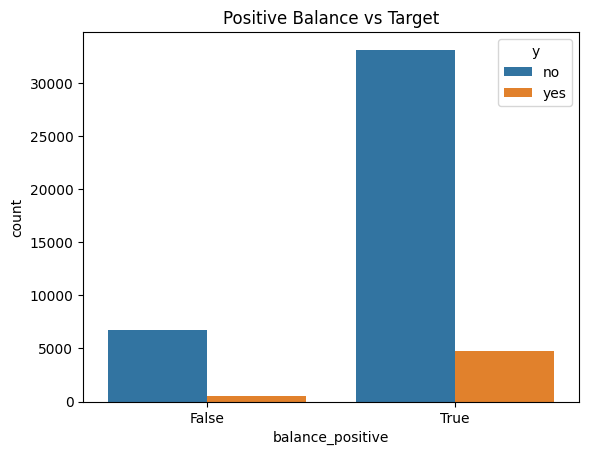

In [12]:
# Feature Engineering

df['balance_positive'] = df['balance'] > 0
sns.countplot(data=df, x='balance_positive', hue='y')
plt.title('Positive Balance vs Target')
plt.show()
